In [1]:
# import libraries
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
from ipywidgets import Layout, Box, Label, RadioButtons, Tab, HBox, VBox, Accordion, Select, interactive, Dropdown, interact

In [2]:
########################################## RUN PFLOTRAN ####################################
import subprocess
#import shutil
#shutil.copy("/software/pflotran/regression_tests/default/batch/cybernetic.py",".")
#shutil.copy("/software/pflotran/database/cybernetic.dat",".")

In [3]:
#fout = open("OM_oxidation-Kbase.stdout","w")
#subprocess.run(["pflotran","-input_prefix","OM_oxidation-Kbase"],stdout=fout, stderr=fout)
#fout.close()

In [4]:
# OWC WTEOXNIC 1 Experimental Data
exp_time = [0, 1.084027778, 3.042361111, 4.086111111, 7.090277778, 8.086805556, 8.906944444, 9.929166667, 11.05069444, 13.94305556, 14.86736111, 16.06319444, 17.13680556, 20.84861111]
exp_CO2 = [17.74520777, 81.7342345, 289.6382737, 407.1846165, 545.6161005, 587.9337573, 558.7574859, 551.9690965, 530.4826586, 576.948483, 594.0476719, 549.1568297, 493.9690238, 562.1841415]

exp_time_pH = [0, 11.07986111]
exp_pH = [6.264, 7.67]

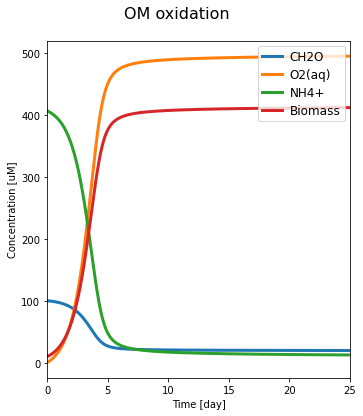

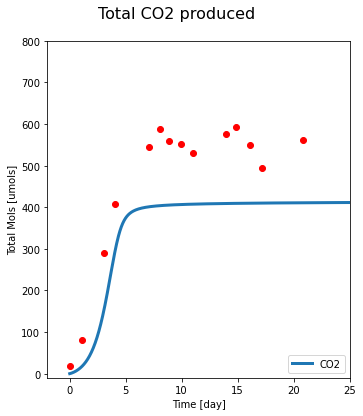

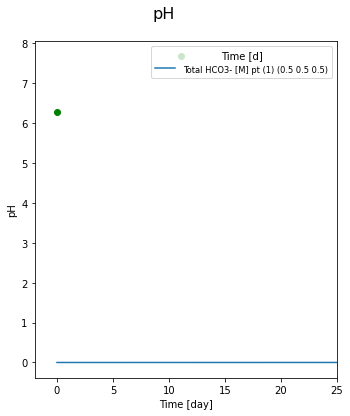

In [5]:
########################################### PLOT RESULTS ###################################
import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')
#import numpy as np
#%matplotlib notebook
#%matplotlib inline
#%matplotlib widget

import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')

#import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

path = []
path.append('.')

#filename = './OM_oxidation-Kbase-obs-0.pft'
filename = 'generic_carbon_lambda-obs-0.pft'

f = plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
f.suptitle("OM oxidation",fontsize=16)
plt.xlabel('Time [day]')
plt.ylabel('Concentration [uM]')

plt.xlim(0.,25)

icol = []
#icol.append(2)  # This is pH
icol.append(3)
icol.append(4)
icol.append(5)
icol.append(6)

label=['CH2O','O2(aq)','NH4+','Biomass']

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
#  plt.plot(data.get_array('x'),data.get_array('y'),label=data.get_name('yname'), linewidth=3)
  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=label[i], linewidth=3)

plt.legend(loc=1)
plt.setp(plt.gca().get_legend().get_texts(),fontsize='large')
#plt.setp(plt.gca().get_legend().get_frame().set_fill(False))
#plt.setp(plt.gca().get_legend().draw_frame(False))
#plt.legend(loc='center right')
f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.2,right=.9)
plt.show()

################## Total CO2 produced Plot ####################
f = plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
f.suptitle("Total CO2 produced",fontsize=16)
plt.xlabel('Time [day]')
plt.ylabel('Total Mols [umols]')

plt.xlim(-2.,25)
plt.ylim(-10.,800)

icol = []
icol.append(8)

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
#  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=3)
  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label='CO2', linewidth=3)
#  plt.plot(data.get_array('x'),data.get_array('y')*1000000)

plt.legend(loc=1)
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
#plt.setp(plt.gca().get_legend().get_frame().set_fill(False))
#plt.setp(plt.gca().get_legend().draw_frame(False))
plt.legend(loc='lower right')

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.2,right=.9)

plt.plot(exp_time, exp_CO2,'ro')
plt.show()

################## Total pH  Plot ####################
f = plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
f.suptitle("pH",fontsize=16)
plt.xlabel('Time [day]')
plt.ylabel('pH')

plt.xlim(-2.,25)
#plt.ylim(-10.,600)

icol = []
icol.append(2)

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  plt.plot(data.get_array('x'),data.get_array('y'),label=data.get_name('yname'))
#    plt.plot(data.get_array('x'),data.get_array('y'),label='data')

plt.legend(loc=1,title='Time [d]')
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.2,right=.9)

plt.plot(exp_time_pH, exp_pH,'go')
plt.show()